Time period: 1985 to 2021
Number of countries: 66
Variables: Entity, Code, Year, Renewables (% electricity)


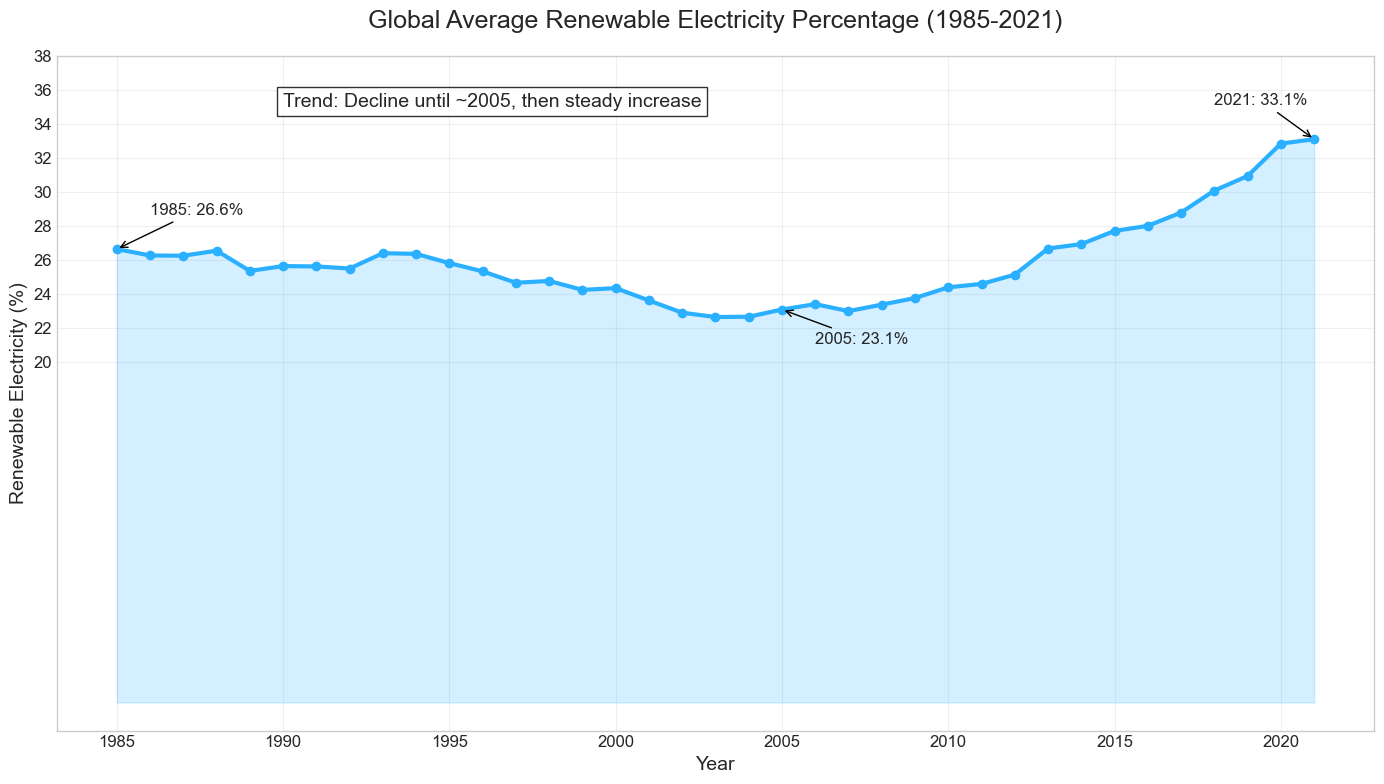

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

renewables_df = pd.read_csv('../datasets/clean_countries_renewables_1985_2021.csv')
gdp_df = pd.read_csv('../datasets/gdp_data_news.csv')

print(f"Time period: {renewables_df['Year'].min()} to {renewables_df['Year'].max()}")
print(f"Number of countries: {renewables_df['Entity'].nunique()}")
print(f"Variables: {', '.join(renewables_df.columns)}")

plt.figure(figsize=(14, 8))
yearly_avg = renewables_df.groupby('Year')['Renewables (% electricity)'].mean()

# Plot the trend
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=3, color='#2ab0ff')
plt.fill_between(yearly_avg.index, yearly_avg.values, alpha=0.2, color='#2ab0ff')

plt.title('Global Average Renewable Electricity Percentage (1985-2021)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Renewable Electricity (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1985, 2022, 5))
plt.yticks(range(20, 40, 2))

# Add annotations for key points
plt.annotate(f'1985: {yearly_avg[1985]:.1f}%',
             xy=(1985, yearly_avg[1985]),
             xytext=(1986, yearly_avg[1985]+2),
             fontsize=12,
             arrowprops=dict(arrowstyle="->", color='black'))

plt.annotate(f'2005: {yearly_avg[2005]:.1f}%',
             xy=(2005, yearly_avg[2005]),
             xytext=(2006, yearly_avg[2005]-2),
             fontsize=12,
             arrowprops=dict(arrowstyle="->", color='black'))

plt.annotate(f'2021: {yearly_avg[2021]:.1f}%',
             xy=(2021, yearly_avg[2021]),
             xytext=(2018, yearly_avg[2021]+2),
             fontsize=12,
             arrowprops=dict(arrowstyle="->", color='black'))

plt.text(1990, 35, "Trend: Decline until ~2005, then steady increase",
         fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('global_trend.png')
plt.show()


<ipython-input-20-aca431350e16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Entity', y='Renewables (% electricity)', data=top_countries_2021,


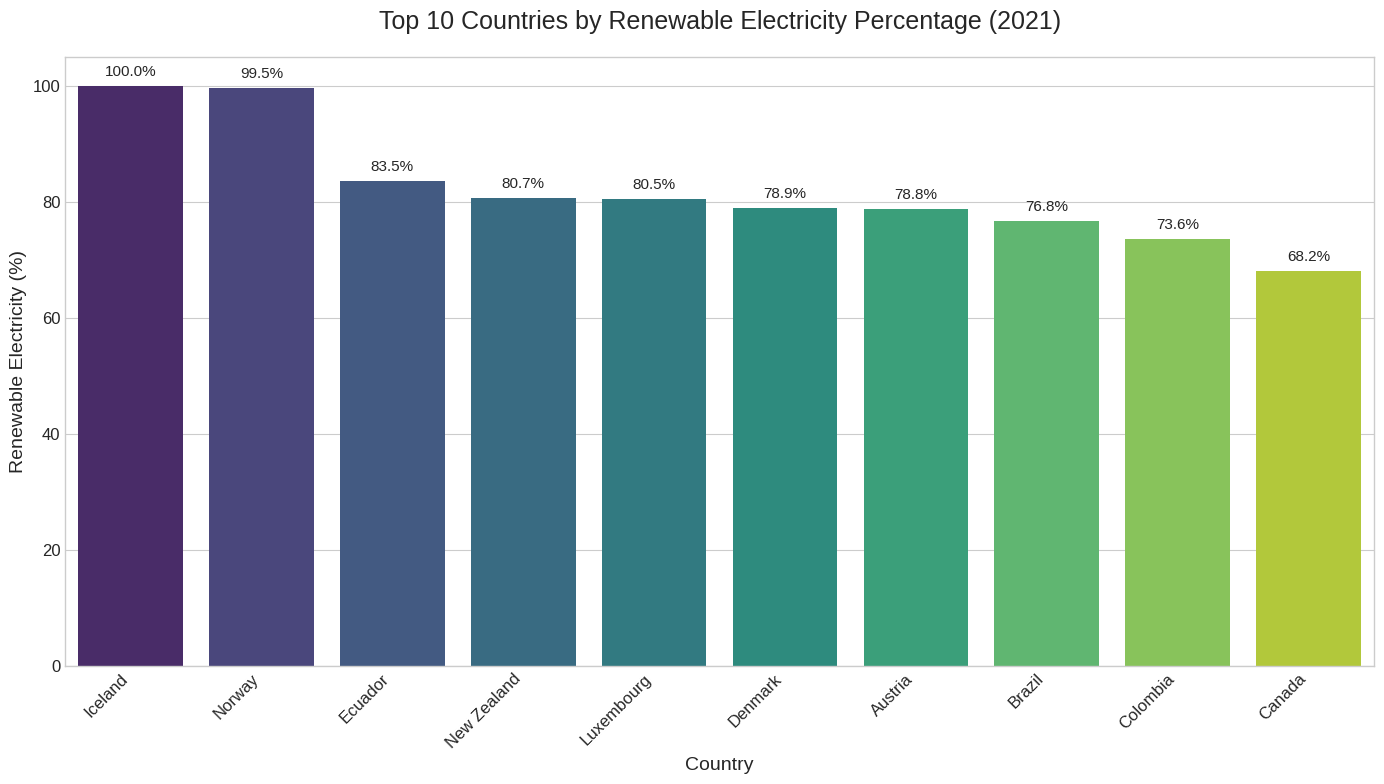

In [ ]:
#Top countries 2021
top_countries_2021 = renewables_df[renewables_df['Year'] == 2021].sort_values(
    by='Renewables (% electricity)', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Entity', y='Renewables (% electricity)', data=top_countries_2021,
                palette=sns.color_palette("viridis", 10))
plt.title('Top 10 Countries by Renewable Electricity Percentage (2021)', fontsize=18, pad=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Renewable Electricity (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
for i, p in enumerate(ax.patches):
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11,
                rotation=0, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('top_countries_2021.png')
plt.show()

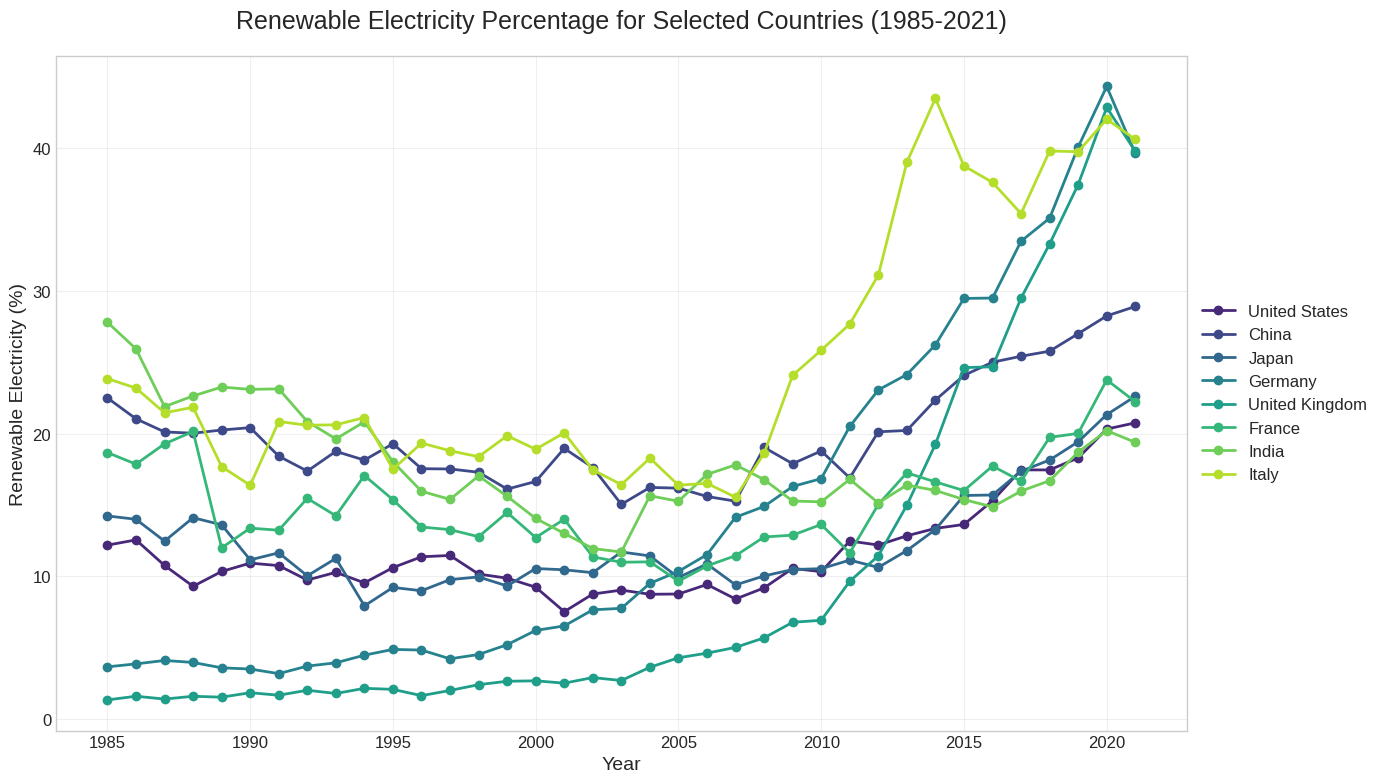

In [ ]:
interesting_countries = ['United States', 'China', 'Japan', 'Germany',
                         'United Kingdom', 'France', 'India', 'Italy']
plt.figure(figsize=(14, 8))

# Create a colorful palette
colors = sns.color_palette("viridis", len(interesting_countries))

for i, country in enumerate(interesting_countries):
    country_data = renewables_df[renewables_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% electricity)'],
             marker='o', linewidth=2, label=country, color=colors[i])

plt.title('Renewable Electricity Percentage for Selected Countries (1985-2021)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Renewable Electricity (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(1985, 2022, 5))

# Annotations for notable patterns


plt.tight_layout()
plt.savefig('selected_countries.png')
plt.show()

Available countries:
1. Algeria
2. Argentina
3. Australia
4. Austria
5. Bangladesh
6. Belgium
7. Brazil
8. Bulgaria
9. Canada
10. Chile
11. China
12. Colombia
13. Cyprus
14. Czechia
15. Denmark
16. Ecuador
17. Egypt
18. Finland
19. France
20. Germany
21. Greece
22. Hong Kong
23. Hungary
24. Iceland
25. India
26. Indonesia
27. Iran
28. Iraq
29. Ireland
30. Israel
31. Italy
32. Japan
33. Kuwait
34. Luxembourg
35. Malaysia
36. Mexico
37. Morocco
38. Netherlands
39. New Zealand
40. Norway
41. Oman
42. Pakistan
43. Peru
44. Philippines
45. Poland
46. Portugal
47. Qatar
48. Romania
49. Saudi Arabia
50. Singapore
51. Slovakia
52. South Africa
53. South Korea
54. Spain
55. Sri Lanka
56. Sweden
57. Switzerland
58. Taiwan
59. Thailand
60. Trinidad and Tobago
61. Turkey
62. United Arab Emirates
63. United Kingdom
64. United States
65. Venezuela
66. Vietnam

Enter country names separated by commas (e.g., Thailand, China, Germany): Thailand

Analyzing renewable energy adoption for: Thailand


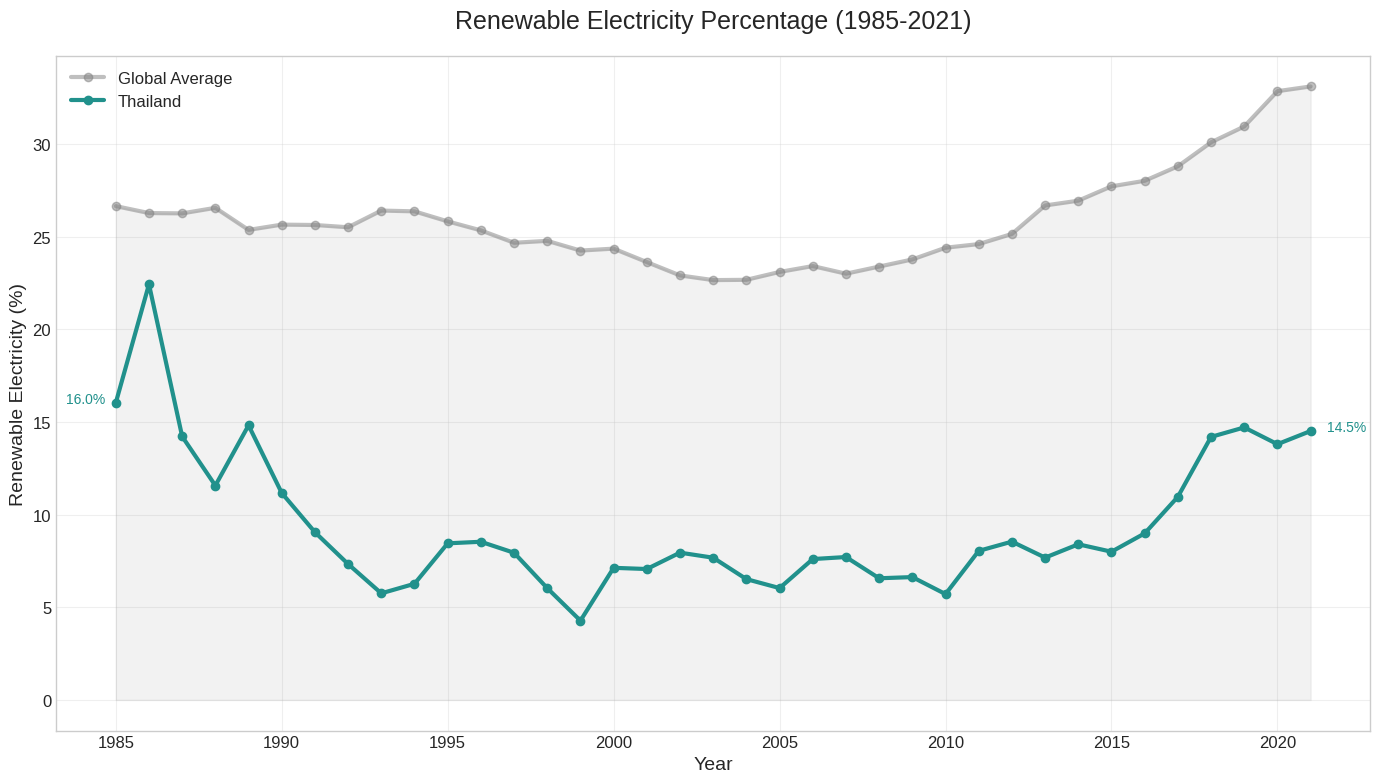


Renewable Energy Statistics:
--------------------------------------------------------------------------------
Country         1985 (%)   2000 (%)   2021 (%)   Change     Pattern             
--------------------------------------------------------------------------------
Thailand        16.03      7.13       14.51      -1.52+++++ Decline then growth 


In [ ]:

#Input any countries by user and tell renewable energy statistic
def analyze_renewable_energy(countries_to_analyze=None):
    # Set the style for plots
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("viridis")
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 12

    renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')

    available_countries = sorted(renewables_df['Entity'].unique())

    if countries_to_analyze is None:
        print("Available countries:")
        for i, country in enumerate(available_countries, 1):
            print(f"{i}. {country}")

        user_input = input("\nEnter country names separated by commas (e.g., Thailand, China, Germany): ")
        countries_to_analyze = [country.strip() for country in user_input.split(',')]

    valid_countries = []
    invalid_countries = []

    for country in countries_to_analyze:
        if country in available_countries:
            valid_countries.append(country)
        else:
            invalid_countries.append(country)

    if invalid_countries:
        print(f"\nWarning: The following countries were not found in the dataset: {', '.join(invalid_countries)}")

    if not valid_countries:
        print("No valid countries specified. Analysis cannot proceed.")
        return

    print(f"\nAnalyzing renewable energy adoption for: {', '.join(valid_countries)}")
    plt.figure(figsize=(14, 8))
    yearly_avg = renewables_df.groupby('Year')['Renewables (% electricity)'].mean()

    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=3,
             color='gray', alpha=0.5, label='Global Average')

    # Add light gray for global trend
    plt.fill_between(yearly_avg.index, yearly_avg.values, alpha=0.1, color='gray')

    plt.title('Renewable Electricity Percentage (1985-2021)', fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Renewable Electricity (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1985, 2022, 5))

    # color for countries
    colors = sns.color_palette("viridis", len(valid_countries))

    # Plot each selected country
    for i, country in enumerate(valid_countries):
        country_data = renewables_df[renewables_df['Entity'] == country]

        if not country_data.empty:
            plt.plot(country_data['Year'], country_data['Renewables (% electricity)'],
                    marker='o', linewidth=3, label=country, color=colors[i])

            # Annotate the start and end points
            start_value = country_data[country_data['Year'] == 1985]['Renewables (% electricity)'].values[0]
            end_value = country_data[country_data['Year'] == 2021]['Renewables (% electricity)'].values[0]

            plt.annotate(f'{start_value:.1f}%',
                        xy=(1985, start_value),
                        xytext=(1985-1.5, start_value),
                        fontsize=10, color=colors[i])

            plt.annotate(f'{end_value:.1f}%',
                        xy=(2021, end_value),
                        xytext=(2021+0.5, end_value),
                        fontsize=10, color=colors[i])

    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()

    # Save and show the plot
    plt.savefig('selected_countries_renewables.png')
    plt.show()

    # Print statistics for selected countries
    print("\nRenewable Energy Statistics:")
    print("-" * 80)
    print(f"{'Country':<15} {'1985 (%)':<10} {'2000 (%)':<10} {'2021 (%)':<10} {'Change':<10} {'Pattern':<20}")
    print("-" * 80)

    for country in valid_countries:
        country_data = renewables_df[renewables_df['Entity'] == country]

        if not country_data.empty:
            # Get values for key years
            value_1985 = country_data[country_data['Year'] == 1985]['Renewables (% electricity)'].values[0]
            value_2000 = country_data[country_data['Year'] == 2000]['Renewables (% electricity)'].values[0]
            value_2021 = country_data[country_data['Year'] == 2021]['Renewables (% electricity)'].values[0]

            total_change = value_2021 - value_1985

            early_change = value_2000 - value_1985
            late_change = value_2021 - value_2000

            if early_change > 0 and late_change > 0:
                if late_change > early_change * 2:
                    pattern = "Accelerating growth"
                elif early_change > late_change * 2:
                    pattern = "Decelerating growth"
                else:
                    pattern = "Steady growth"
            elif early_change < 0 and late_change > 0:
                pattern = "Decline then growth"
            elif early_change > 0 and late_change < 0:
                pattern = "Growth then decline"
            elif early_change < 0 and late_change < 0:
                pattern = "Steady decline"
            else:
                pattern = "Mixed"

            print(f"{country:<15} {value_1985:<10.2f} {value_2000:<10.2f} {value_2021:<10.2f} {total_change:+<10.2f} {pattern:<20}")


# When called without parameters, it will prompt the user for input
if __name__ == "__main__":
    analyze_renewable_energy()

<ipython-input-23-5c78b4031440>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_improved.index, y='improvement', data=top_improved, palette="viridis")


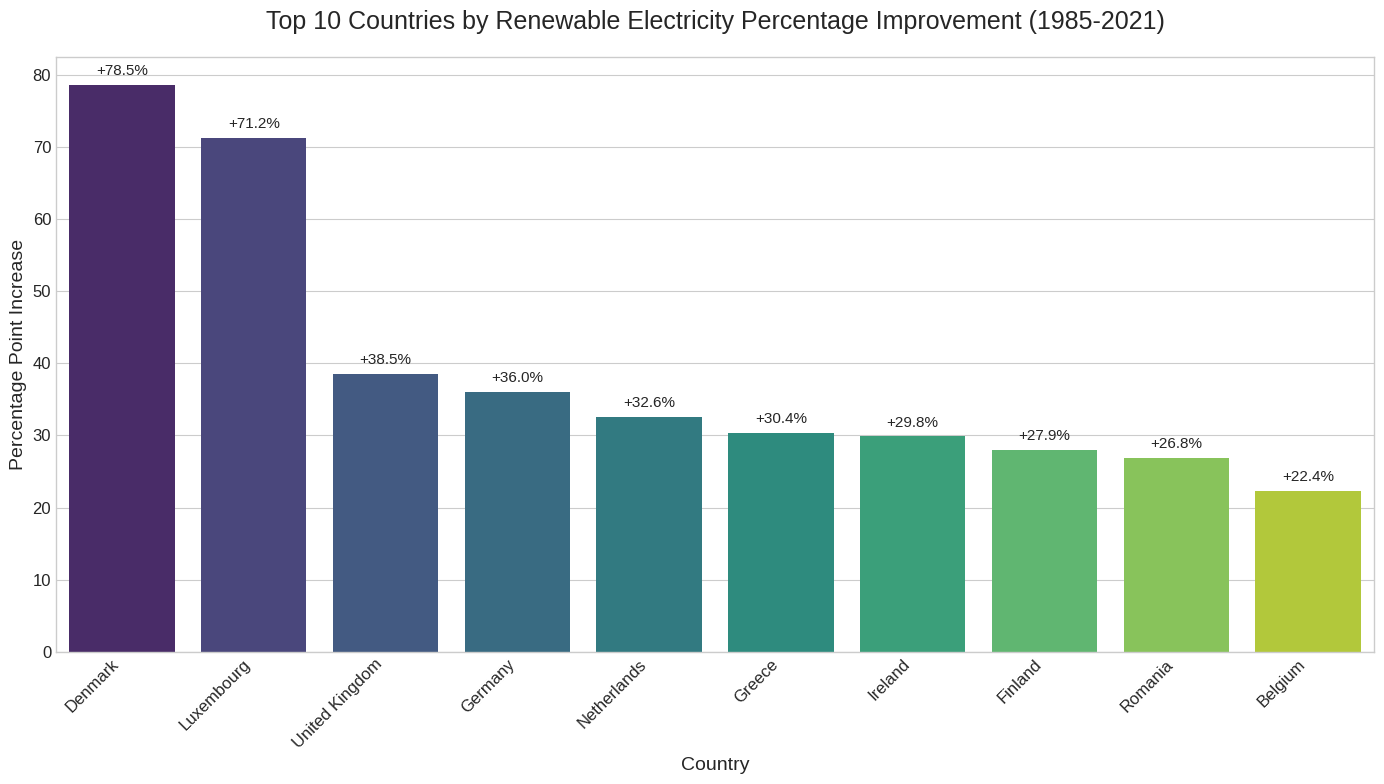

In [ ]:
#Top 10 Improve in renewable energy
renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')

data_1985 = renewables_df[renewables_df['Year'] == 1985].set_index('Entity')
data_2021 = renewables_df[renewables_df['Year'] == 2021].set_index('Entity')

# Calculate improvement for countries that have data for both years
common_countries = list(set(data_1985.index) & set(data_2021.index))

improvements = pd.DataFrame(index=common_countries)
improvements['1985'] = data_1985.loc[common_countries, 'Renewables (% electricity)']
improvements['2021'] = data_2021.loc[common_countries, 'Renewables (% electricity)']
improvements['improvement'] = improvements['2021'] - improvements['1985']

# Sort by improvement and get the top 10
top_improved = improvements.sort_values(by='improvement', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_improved.index, y='improvement', data=top_improved, palette="viridis")
plt.title('Top 10 Countries by Renewable Electricity Percentage Improvement (1985-2021)', fontsize=18, pad=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage Point Increase', fontsize=14)
plt.xticks(rotation=45, ha='right')

for i, p in enumerate(ax.patches):
    improvement = p.get_height()
    ax.annotate(f'+{improvement:.1f}%',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom', fontsize=11,
               rotation=0, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('most_improved.png')
plt.show()

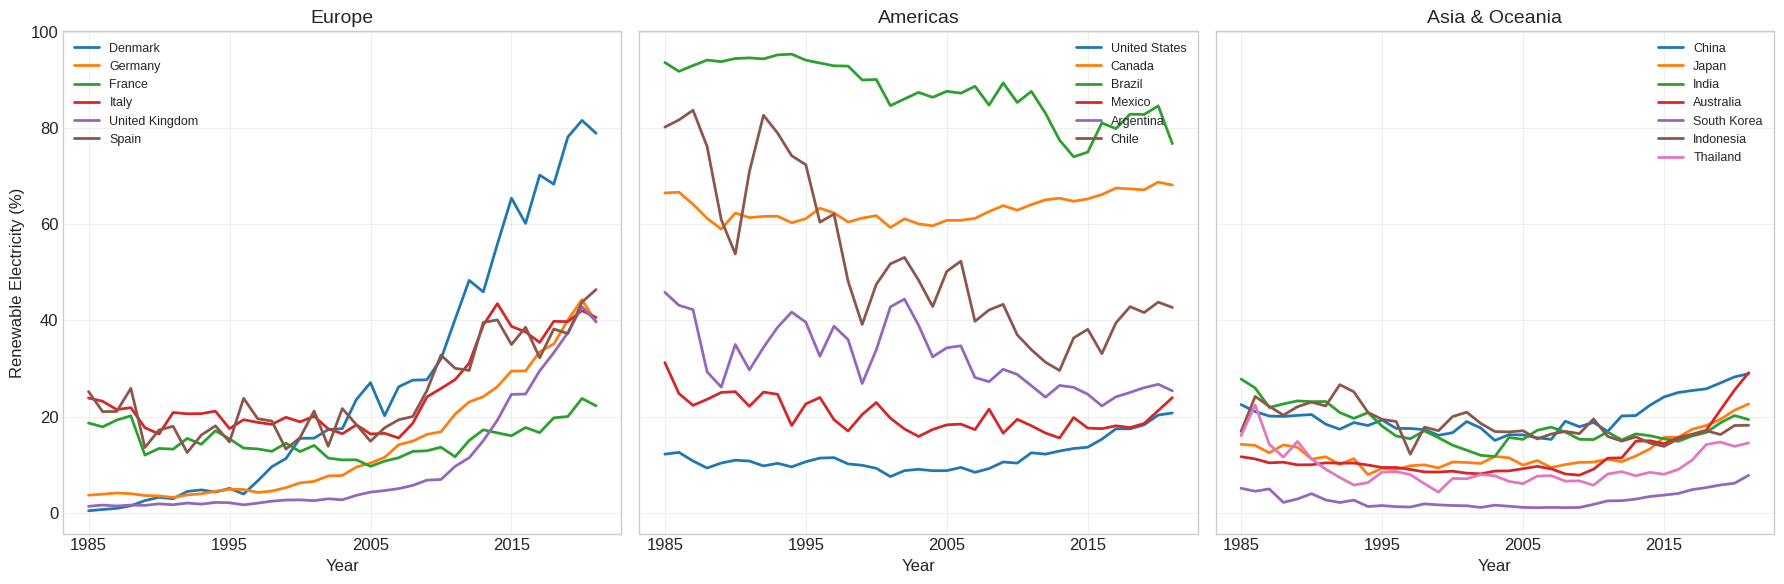

In [ ]:
#Define regions with representative countries
#example countries
regions = {
    'Europe': ['Denmark', 'Germany', 'France', 'Italy', 'United Kingdom', 'Spain'],
    'Americas': ['United States', 'Canada', 'Brazil', 'Mexico', 'Argentina', 'Chile'],
    'Asia & Oceania': ['China', 'Japan', 'India', 'Australia', 'South Korea', 'Indonesia', 'Thailand']
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (region, countries) in enumerate(regions.items()):
    ax = axes[i]

    palette = sns.color_palette("tab10", len(countries))

    for j, country in enumerate(countries):
        country_data = renewables_df[renewables_df['Entity'] == country]
        ax.plot(country_data['Year'], country_data['Renewables (% electricity)'],
                label=country, linewidth=2, color=palette[j])

    ax.set_title(f'{region}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    if i == 0:
        ax.set_ylabel('Renewable Electricity (%)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_xticks(range(1985, 2022, 10))

plt.tight_layout()
plt.savefig('region_renewable.png')
plt.show()


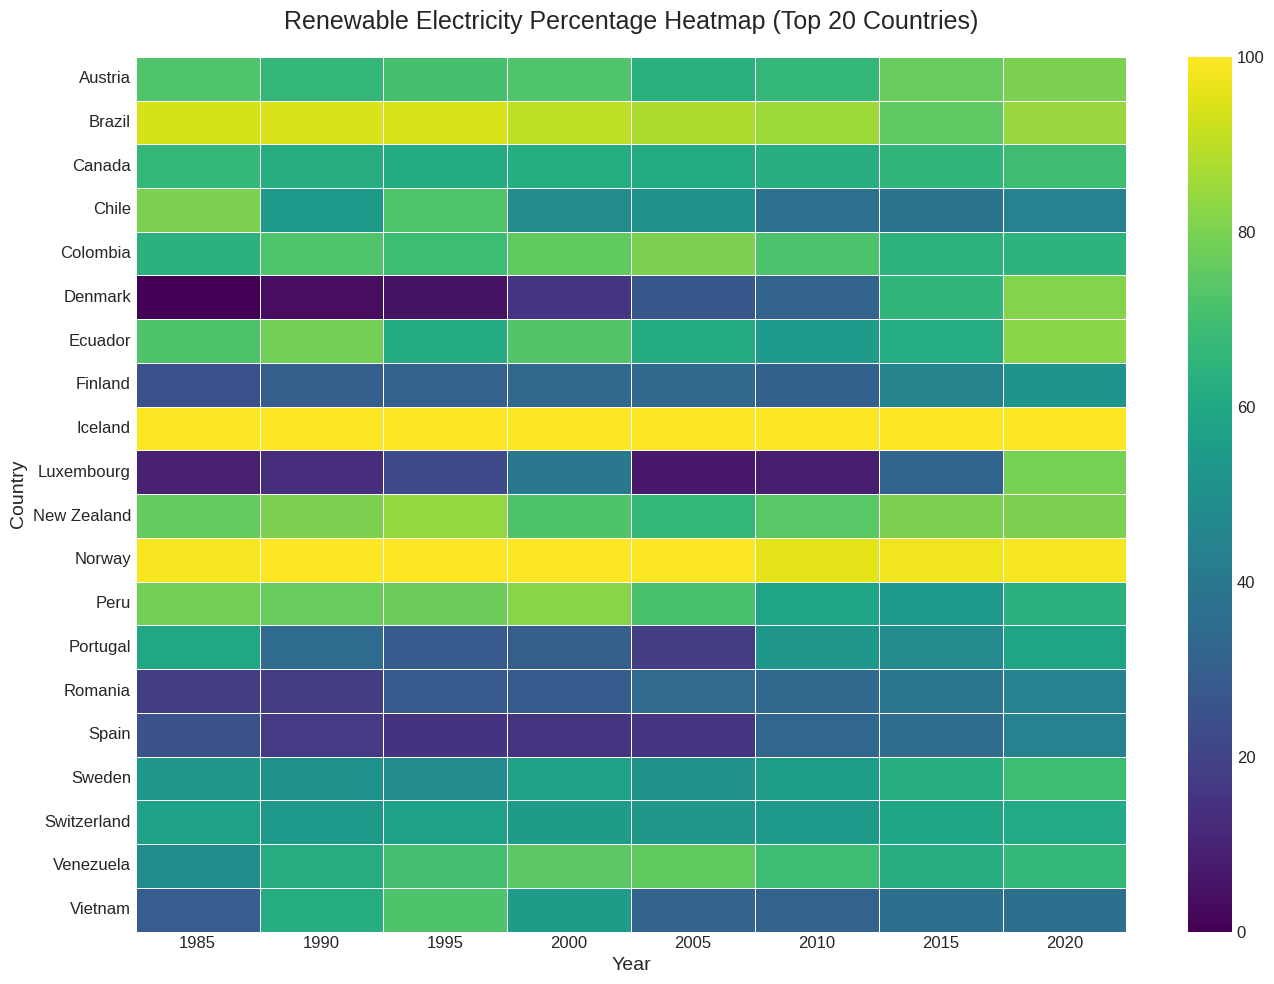

In [ ]:
#heatmap top_20 countries
top20_countries = renewables_df[renewables_df['Year'] == 2021].sort_values(
    by='Renewables (% electricity)', ascending=False).head(20)['Entity'].unique()

heatmap_data = renewables_df[renewables_df['Entity'].isin(top20_countries)].pivot(
    index='Entity', columns='Year', values='Renewables (% electricity)')
years_to_plot = list(range(1985, 2025, 5))
years_to_plot = [year for year in years_to_plot if year <= 2021]
heatmap_data_subset = heatmap_data[years_to_plot]

plt.figure(figsize=(14, 10))
ax = sns.heatmap(heatmap_data_subset, cmap='viridis', linewidths=0.5,
                annot=False, vmin=0, vmax=100)
plt.title('Renewable Electricity Percentage Heatmap (Top 20 Countries)', fontsize=18, pad=20)
plt.ylabel('Country', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('adoption_heatmap.png')
plt.show()

In [ ]:
# 8. Creating a basic pivot table for clustering preparation
# ------------------------------------------
# Create a pivot table: countries as rows, years as columns
pivot_df = renewables_df.pivot_table(index='Entity', columns='Year',
                                    values='Renewables (% electricity)')

# Print top rows of the pivot table
print("\nPivot table preview (first 5 countries, selected years):")
years_to_show = [1985, 1995, 2005, 2015, 2021]
print(pivot_df[years_to_show].head())

print("\nThis pivot table can be used for K-means clustering in the next stage.")
print("Each row represents a country's renewable adoption trajectory across years,")
print("which can be treated as a multi-dimensional point for clustering.")


Pivot table preview (first 5 countries, selected years):
Year             1985       1995       2005       2015       2021
Entity                                                           
Algeria      5.263158   0.978950   1.723598   0.340136   1.173588
Argentina   45.853027  39.635246  34.304974  24.653460  25.347696
Australia   11.640788   9.407731   9.156236  14.347600  29.134624
Austria     72.512630  70.514680  63.389675  76.944220  78.790146
Bangladesh  16.320673   3.442532   5.033425   1.492806   1.725208

This pivot table can be used for K-means clustering in the next stage.
Each row represents a country's renewable adoption trajectory across years,
which can be treated as a multi-dimensional point for clustering.


In [ ]:

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')
gdp_df = pd.read_csv('gdp_data_news.csv')

gdp_long = pd.melt(
    gdp_df,
    id_vars=['Country Name', 'Country Code', 'Indicator Name'],
    var_name='Year',
    value_name='GDP'
)

gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')

gdp_long = gdp_long[~np.isnan(gdp_long['Year'])]

gdp_long = gdp_long.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

print("GDP Data Preview:")
print(gdp_long.head())
print(f"Years in GDP data: {gdp_long['Year'].min()} to {gdp_long['Year'].max()}")
print(f"Number of countries in GDP data: {gdp_long['Entity'].nunique()}")

print("\nRenewables Data Preview:")
print(renewables_df.head())
print(f"Years in renewables data: {renewables_df['Year'].min()} to {renewables_df['Year'].max()}")
print(f"Number of countries in renewables data: {renewables_df['Entity'].nunique()}")

# Merge the datasets on Country Code and Year
merged_df = pd.merge(
    renewables_df,
    gdp_long,
    on=['Code', 'Year'],
    how='inner',
    suffixes=('_renewable', '_gdp')
)

print("\nMerged Data Preview:")
print(merged_df.head())
print(f"Number of rows in merged data: {merged_df.shape[0]}")
print(f"Number of countries in merged data: {merged_df['Entity_renewable'].nunique()}")
print(f"Years in merged data: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

data_2021 = merged_df[merged_df['Year'] == 2021].copy()


GDP Data Preview:
                        Entity Code     Indicator Name  Year           GDP
0  Africa Eastern and Southern  AFE  GDP (current US$)  1985  1.493982e+11
1   Africa Western and Central  AFW  GDP (current US$)  1985  1.378029e+11
2                       Angola  AGO  GDP (current US$)  1985  7.554065e+09
3                      Albania  ALB  GDP (current US$)  1985  1.897050e+09
4                      Andorra  AND  GDP (current US$)  1985  3.467427e+08
Years in GDP data: 1985 to 2021
Number of countries in GDP data: 210

Renewables Data Preview:
    Entity Code  Year  Renewables (% electricity)
0  Algeria  DZA  1985                    5.263158
1  Algeria  DZA  1986                    1.925892
2  Algeria  DZA  1987                    3.922339
3  Algeria  DZA  1988                    1.310325
4  Algeria  DZA  1989                    1.474811
Years in renewables data: 1985 to 2021
Number of countries in renewables data: 66

Merged Data Preview:
  Entity_renewable Code  Year  Re

In [ ]:
! pip install adjustText

Loading data...
Available years: 1985 to 2021
Enter a year between 1985 and 2021: 2016

Analyzing GDP vs Renewable Energy for 2016...
Number of countries with data: 60
Correlation between GDP and Renewable %: -0.067 (p-value: 0.613)


/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  ax.figure.draw_without_rendering()
<ipython-input-31-72c8a18df09a>:190: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.savefig(f'gdp_vs_renewables_all_labels_{year}.png', dpi=300, bbox_inches='tight')
<ipython-input-31-72c8a18df09a>:190: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.savefig(f'gdp_vs_renewables_all_labels_{year}.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib

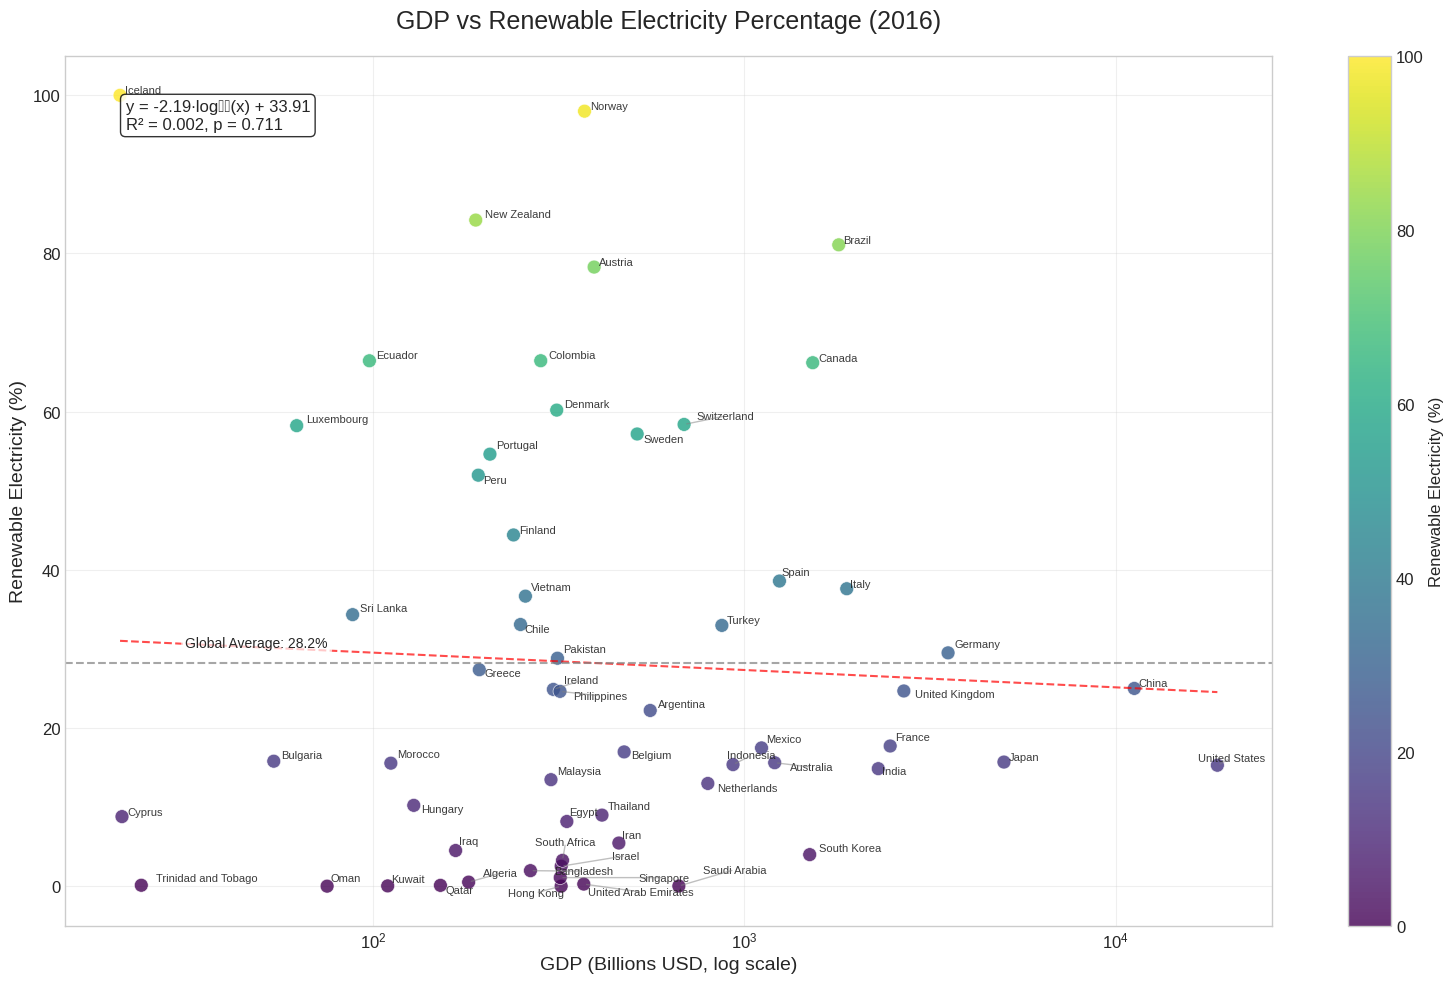


Average renewable percentage: 28.212085729533328
Median renewable percentage: 17.600994
Standard deviation: 26.858297671476745

Top 10 countries by GDP:
     Entity_renewable  GDP_billions  Renewables (% electricity)
2177    United States  18804.913000                   15.288093
401             China  11233.313730                   25.000778
1141            Japan   5003.677628                   15.692011
697           Germany   3537.784108                   29.499044
2140   United Kingdom   2689.106567                   24.678839
660            France   2470.407620                   17.721292
882             India   2294.796886                   14.854848
1104            Italy   1887.111188                   37.607937
253            Brazil   1795.693483                   81.093800
327            Canada   1527.994742                   66.189060

Top 10 countries by Renewable Electricity Percentage:
     Entity_renewable  Renewables (% electricity)  GDP_billions
845           Iceland  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from adjustText import adjust_text  # For smart label placement

def gdp_renewable_scatter_all_labels(year=None):
    """
    Create a scatter plot of GDP vs renewable energy percentage for a specific year,
    with all countries labeled.

    Parameters:
    year (int): Year to analyze. If None, will prompt user for input.

    Returns:
    Matplotlib figure - The scatter plot figure
    """
    # Set the visualization style
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("viridis")
    plt.rcParams['figure.figsize'] = (16, 10)  # Larger figure for better label visibility
    plt.rcParams['font.size'] = 12

    # Read the data
    print("Loading data...")
    renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')
    gdp_df = pd.read_csv('gdp_data_news.csv')

    # Reshape the GDP data from wide to long format
    gdp_long = pd.melt(
        gdp_df,
        id_vars=['Country Name', 'Country Code', 'Indicator Name'],
        var_name='Year',
        value_name='GDP'
    )

    # Convert Year to integer
    gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')

    # Filter out non-year columns and drop rows with NaN years
    gdp_long = gdp_long[~np.isnan(gdp_long['Year'])]

    # Rename columns for consistency
    gdp_long = gdp_long.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

    # Merge the datasets on Country Code and Year
    merged_df = pd.merge(
        renewables_df,
        gdp_long,
        on=['Code', 'Year'],
        how='inner',
        suffixes=('_renewable', '_gdp')
    )

    # Get the available years from the data
    available_years = sorted(merged_df['Year'].unique())
    min_year = int(min(available_years))
    max_year = int(max(available_years))

    # If no year provided, prompt user for input
    if year is None:
        print(f"Available years: {min_year} to {max_year}")
        while True:
            try:
                year_input = input(f"Enter a year between {min_year} and {max_year}: ")
                year = int(year_input)
                if year < min_year or year > max_year:
                    print(f"Year must be between {min_year} and {max_year}. Please try again.")
                    continue
                break
            except ValueError:
                print("Please enter a valid year (integer).")

    # Filter data for the selected year
    year_data = merged_df[merged_df['Year'] == year].copy()

    if year_data.empty:
        print(f"No data available for the year {year}.")
        return None

    print(f"\nAnalyzing GDP vs Renewable Energy for {year}...")
    print(f"Number of countries with data: {len(year_data)}")

    # Convert GDP to billions for better readability
    year_data['GDP_billions'] = year_data['GDP'] / 1e9

    # Calculate correlation
    corr, p_value = stats.pearsonr(year_data['GDP'], year_data['Renewables (% electricity)'])
    print(f"Correlation between GDP and Renewable %: {corr:.3f} (p-value: {p_value:.3f})")

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(16, 10))

    scatter = ax.scatter(
        year_data['GDP_billions'],
        year_data['Renewables (% electricity)'],
        s=100,  # Larger point size
        alpha=0.8,
        c=year_data['Renewables (% electricity)'],
        cmap='viridis',
        edgecolors='white',
        linewidth=0.5
    )

    # Set logarithmic scale for x-axis
    ax.set_xscale('log')

    # Add grid
    ax.grid(True, alpha=0.3)

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Renewable Electricity (%)', fontsize=12)

    # Add trendline
    x_data = np.log10(year_data['GDP_billions'])
    y_data = year_data['Renewables (% electricity)']

    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

    # Generate points for the line
    x_line = np.linspace(min(x_data), max(x_data), 100)
    y_line = slope * x_line + intercept

    # Convert back from log scale for plotting
    x_line_orig = 10 ** x_line

    # Plot the regression line
    ax.plot(x_line_orig, y_line, color='red', linestyle='--', alpha=0.7)

    # Add the regression equation and R-squared to the plot
    ax.text(
        0.05, 0.95,
        f'y = {slope:.2f}·log₁₀(x) + {intercept:.2f}\nR² = {r_value**2:.3f}, p = {p_value:.3f}',
        transform=ax.transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    # Add a horizontal line at the global average
    global_avg = year_data['Renewables (% electricity)'].mean()
    ax.axhline(y=global_avg, color='gray', linestyle='--', alpha=0.7)
    ax.text(
        year_data['GDP_billions'].min() * 1.5,
        global_avg + 2,
        f'Global Average: {global_avg:.1f}%',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7, ec="none")
    )

    # Label all countries
    texts = []
    for idx, row in year_data.iterrows():
        # Create text annotation for each country
        text = ax.text(
            row['GDP_billions'],
            row['Renewables (% electricity)'],
            row['Entity_renewable'],
            fontsize=8,
            alpha=0.9
        )
        texts.append(text)

    # Use adjust_text to prevent label overlap (if available)
    try:
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.1, 0.25)
        )
    except:
        print("Note: For better label placement, install the adjustText library: pip install adjustText")
        # Alternative approach if adjustText is not available
        for text in texts:
            # Add small random offsets to reduce overlap
            x, y = text.get_position()
            text.set_position((x * (1 + np.random.uniform(-0.05, 0.05)),
                              y + np.random.uniform(-3, 3)))

    # Set titles and labels
    ax.set_title(f'GDP vs Renewable Electricity Percentage ({year})', fontsize=18, pad=20)
    ax.set_xlabel('GDP (Billions USD, log scale)', fontsize=14)
    ax.set_ylabel('Renewable Electricity (%)', fontsize=14)

    plt.tight_layout()
    plt.savefig(f'gdp_vs_renewables_all_labels_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print additional statistics
    print("\nAverage renewable percentage:", global_avg)
    print("Median renewable percentage:", year_data['Renewables (% electricity)'].median())
    print("Standard deviation:", year_data['Renewables (% electricity)'].std())

    print("\nTop 10 countries by GDP:")
    print(year_data.sort_values('GDP', ascending=False)[['Entity_renewable', 'GDP_billions', 'Renewables (% electricity)']].head(10))

    print("\nTop 10 countries by Renewable Electricity Percentage:")
    print(year_data.sort_values('Renewables (% electricity)', ascending=False)[['Entity_renewable', 'Renewables (% electricity)', 'GDP_billions']].head(10))

    return fig, year_data

# Alternative version with two different label placement approaches
def gdp_renewable_scatter_all_labels_alternative(year=None):
    """
    Alternative version with two different approaches to label placement.

    This function creates two plots:
    1. Using a smart layout with connecting lines
    2. Using carefully positioned annotations

    Parameters:
    year (int): Year to analyze. If None, will prompt user for input.
    """
    # Same data preparation code as the main function...
    # [data preparation code goes here]

    # Create two plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

    # [plotting code for both approaches]

    plt.tight_layout()
    plt.savefig(f'gdp_vs_renewables_all_labels_comparison_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
if __name__ == "__main__":
    fig, data = gdp_renewable_scatter_all_labels()

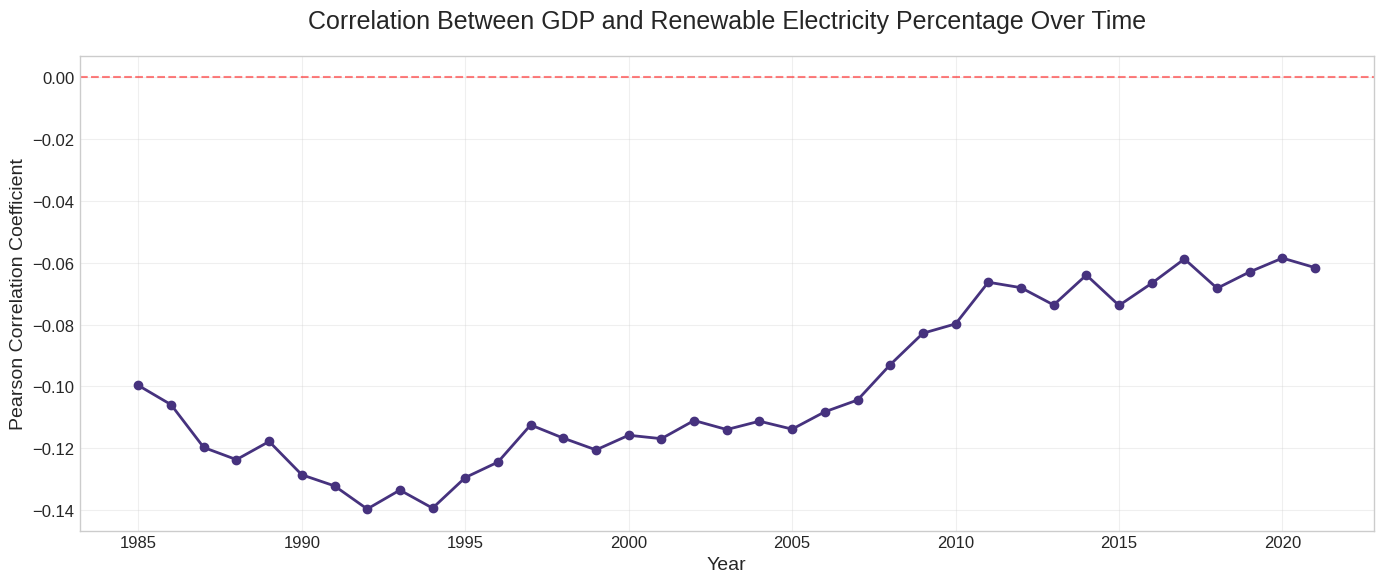

In [ ]:
#Correlation analysis over time
correlations = []
years = sorted(merged_df['Year'].unique())

for year in years:
    year_data = merged_df[merged_df['Year'] == year]
    corr, p_value = stats.pearsonr(year_data['GDP'], year_data['Renewables (% electricity)'])
    correlations.append({
        'Year': year,
        'Correlation': corr,
        'P_Value': p_value
    })

corr_df = pd.DataFrame(correlations)

plt.figure(figsize=(14, 6))
plt.plot(corr_df['Year'], corr_df['Correlation'], marker='o', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.title('Correlation Between GDP and Renewable Electricity Percentage Over Time', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Pearson Correlation Coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_over_time.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_gdp_categories():
    """
    Interactive visualization of GDP categories by year.
    Allows user to select a year and see which countries fall into each GDP category.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("viridis")

    print("Loading data...")
    renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')
    gdp_df = pd.read_csv('gdp_data_news.csv')

    gdp_long = pd.melt(
        gdp_df,
        id_vars=['Country Name', 'Country Code', 'Indicator Name'],
        var_name='Year',
        value_name='GDP'
    )

    gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')
    gdp_long = gdp_long[~np.isnan(gdp_long['Year'])]

    gdp_long = gdp_long.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

    merged_df = pd.merge(
        renewables_df,
        gdp_long,
        on=['Code', 'Year'],
        how='inner',
        suffixes=('_renewable', '_gdp')
    )

    merged_df['GDP_billions'] = merged_df['GDP'] / 1e9

    def categorize_gdp(gdp_billions):
        if gdp_billions < 100:
            return 'Low (< $100B)'
        elif gdp_billions < 500:
            return 'Medium ($100B - $500B)'
        elif gdp_billions < 1000:
            return 'High ($500B - $1T)'
        else:
            return 'Very High (> $1T)'

    merged_df['GDP_Category'] = merged_df['GDP_billions'].apply(categorize_gdp)

    category_order = [
        'Very High (> $1T)',
        'High ($500B - $1T)',
        'Medium ($100B - $500B)',
        'Low (< $100B)'
    ]

    category_colors = {
        'Low (< $100B)': '#440154',
        'Medium ($100B - $500B)': '#3b528b',
        'High ($500B - $1T)': '#21918c',
        'Very High (> $1T)': '#5ec962'
    }

    available_years = sorted(merged_df['Year'].unique())

    # Create a function to update the visualization based on selected year
    def update_viz(year):
        year_data = merged_df[merged_df['Year'] == year].copy()

        year_data = year_data.sort_values(['GDP_Category', 'GDP_billions'], ascending=[False, False])

        category_counts = year_data['GDP_Category'].value_counts().reindex(category_order)

        height_per_country = 0.25
        min_height_per_subplot = 3

        subplot_heights = []
        for category in category_order:
            if category in category_counts:
                count = category_counts[category]
                subplot_heights.append(max(count * height_per_country, min_height_per_subplot))
            else:
                subplot_heights.append(min_height_per_subplot)

        total_height = sum(subplot_heights) + 2  # Add extra space for titles

        # Create figure with GridSpec for flexible subplot sizing
        fig = plt.figure(figsize=(16, total_height))
        gs = fig.add_gridspec(4, 1, height_ratios=subplot_heights)
        axes = [fig.add_subplot(gs[i, 0]) for i in range(4)]

        fig.suptitle(f'Countries by GDP Category ({year})', fontsize=22, y=0.98)

        # For each category, create a separate subplot
        for i, category in enumerate(category_order):
            # Filter data for this category
            cat_data = year_data[year_data['GDP_Category'] == category].sort_values('GDP_billions', ascending=False)

            # Limit to top 40 countries if there are too many
            if len(cat_data) > 40:
                cat_data = cat_data.head(40)
                too_many = True
            else:
                too_many = False

            # Create horizontal bar chart
            ax = axes[i]
            if len(cat_data) > 0:  # Only plot if there are countries in this category
                bars = ax.barh(
                    cat_data['Entity_renewable'],
                    cat_data['GDP_billions'],
                    color=category_colors[category],
                    height=0.7
                )

                # Add GDP values as text on the bars
                for bar in bars:
                    width = bar.get_width()
                    if width > 20:  # Only add text for wider bars
                        label_x_pos = width * 1.01
                        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'${width:.0f}B',
                                va='center', fontsize=8)

            # Set titles and labels
            title_text = f'{category} - {len(cat_data)} countries'
            if too_many:
                title_text += ' (showing top 40)'
            ax.set_title(title_text, fontsize=16, pad=10)
            ax.grid(axis='x', alpha=0.3)

            # Only show x-label on the bottom subplot
            if i == 3:
                ax.set_xlabel('GDP (Billions USD)', fontsize=14)

            # Adjust y-tick labels for readability
            ax.tick_params(axis='y', labelsize=9)

            # Add threshold lines appropriate for each category
            thresholds = []
            if category == 'Very High (> $1T)':
                max_gdp = cat_data['GDP_billions'].max() if len(cat_data) > 0 else 10000
                thresholds = [1000]
                if max_gdp > 2000:
                    thresholds.extend([2000, 5000])
                if max_gdp > 10000:
                    thresholds.append(10000)
            elif category == 'High ($500B - $1T)':
                thresholds = [500, 750, 1000]
            elif category == 'Medium ($100B - $500B)':
                thresholds = [100, 250, 500]
            elif category == 'Low (< $100B)':
                thresholds = [25, 50, 75, 100]

            for threshold in thresholds:
                ax.axvline(x=threshold, color='gray', linestyle='--', alpha=0.5)
                ypos = -0.05 * len(cat_data) if len(cat_data) > 0 else -0.5
                ax.text(threshold, ypos, f'${threshold}B', ha='center', fontsize=9)

        plt.tight_layout(rect=[0, 0, 1, 0.96])

        # Create a summary table of country counts
        summary_data = []
        for category in category_order:
            cat_count = len(year_data[year_data['GDP_Category'] == category])
            if cat_count > 0:
                top_countries = year_data[year_data['GDP_Category'] == category].head(3)['Entity_renewable'].tolist()
                top_countries_str = ", ".join(top_countries)
                summary_data.append([category, cat_count, top_countries_str])
            else:
                summary_data.append([category, 0, "None"])

        summary_df = pd.DataFrame(summary_data, columns=['GDP Category', 'Count', 'Top 3 Examples'])

        return fig, summary_df

    # Create the year slider widget
    year_slider = widgets.IntSlider(
        min=min(available_years),
        max=max(available_years),
        step=1,
        value=2021,  # Default to 2021
        description='Year:',
        continuous_update=False,
        layout=widgets.Layout(width='500px')
    )

    # Output widget to display the figure
    output_widget = widgets.Output()

    # Function to handle slider changes
    def on_year_change(change):
        with output_widget:
            clear_output(wait=True)
            year = change['new']
            fig, summary_df = update_viz(year)

            # Display the summary table
            print(f"\nGDP Category Summary for {year}:")
            display(summary_df)

            plt.show()

    # Register the callback
    year_slider.observe(on_year_change, names='value')

    # Initial display
    with output_widget:
        fig, summary_df = update_viz(year_slider.value)

        # Display the summary table
        print(f"\nGDP Category Summary for {year_slider.value}:")
        display(summary_df)

        plt.show()

    # Display the widgets
    display(widgets.VBox([year_slider, output_widget]))

# For environments without ipywidgets support (like standard Python scripts),
# provide a simpler command-line version
def command_line_gdp_categories():
    """
    Command-line version for environments without ipywidgets.
    Ask the user to input a year and display the GDP categories for that year.
    """
    # Load and prepare data (same as in interactive version)
    print("Loading data...")
    renewables_df = pd.read_csv('clean_countries_renewables_1985_2021.csv')
    gdp_df = pd.read_csv('gdp_data_news.csv')

    # Reshape and merge data
    gdp_long = pd.melt(
        gdp_df,
        id_vars=['Country Name', 'Country Code', 'Indicator Name'],
        var_name='Year',
        value_name='GDP'
    )
    gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')
    gdp_long = gdp_long[~np.isnan(gdp_long['Year'])]
    gdp_long = gdp_long.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

    # Merge and categorize
    merged_df = pd.merge(
        renewables_df,
        gdp_long,
        on=['Code', 'Year'],
        how='inner',
        suffixes=('_renewable', '_gdp')
    )
    merged_df['GDP_billions'] = merged_df['GDP'] / 1e9

    def categorize_gdp(gdp_billions):
        if gdp_billions < 100:
            return 'Low (< $100B)'
        elif gdp_billions < 500:
            return 'Medium ($100B - $500B)'
        elif gdp_billions < 1000:
            return 'High ($500B - $1T)'
        else:
            return 'Very High (> $1T)'

    merged_df['GDP_Category'] = merged_df['GDP_billions'].apply(categorize_gdp)

    # Categories and colors
    category_order = [
        'Very High (> $1T)',
        'High ($500B - $1T)',
        'Medium ($100B - $500B)',
        'Low (< $100B)'
    ]

    category_colors = {
        'Low (< $100B)': '#440154',
        'Medium ($100B - $500B)': '#3b528b',
        'High ($500B - $1T)': '#21918c',
        'Very High (> $1T)': '#5ec962'
    }

    # Get available years
    available_years = sorted(merged_df['Year'].unique())
    print(f"Available years: {min(available_years)} to {max(available_years)}")

    # Input validation function
    def get_valid_year():
        while True:
            try:
                year = int(input(f"Enter a year between {min(available_years)} and {max(available_years)}: "))
                if year in available_years:
                    return year
                else:
                    print(f"Year must be between {min(available_years)} and {max(available_years)} and in the dataset.")
            except ValueError:
                print("Please enter a valid year (integer).")

    # Main loop
    while True:
        year = get_valid_year()

        # Filter data for the selected year
        year_data = merged_df[merged_df['Year'] == year].copy()
        year_data = year_data.sort_values(['GDP_Category', 'GDP_billions'], ascending=[False, False])

        # Create visualization
        plt.figure(figsize=(16, 16))
        plt.suptitle(f'Countries by GDP Category ({year})', fontsize=22, y=0.98)

        # Create subplots for each category
        for i, category in enumerate(category_order):
            cat_data = year_data[year_data['GDP_Category'] == category].sort_values('GDP_billions', ascending=False)

            # Create subplot
            plt.subplot(4, 1, i+1)

            if len(cat_data) > 0:  # Only plot if there are countries in this category
                plt.barh(
                    cat_data['Entity_renewable'].head(30),
                    cat_data['GDP_billions'].head(30),
                    color=category_colors[category],
                    height=0.7
                )

            plt.title(f'{category} - {len(cat_data)} countries', fontsize=16, pad=10)
            plt.grid(axis='x', alpha=0.3)

            thresholds = []
            if category == 'Very High (> $1T)':
                thresholds = [1000, 5000]
            elif category == 'High ($500B - $1T)':
                thresholds = [500, 750, 1000]
            elif category == 'Medium ($100B - $500B)':
                thresholds = [100, 250, 500]
            elif category == 'Low (< $100B)':
                thresholds = [25, 50, 75, 100]

            for threshold in thresholds:
                plt.axvline(x=threshold, color='gray', linestyle='--', alpha=0.5)

        plt.tight_layout(rect=[0, 0, 1, 0.95])

        print(f"\nGDP Category Summary for {year}:")
        for category in category_order:
            cat_data = year_data[year_data['GDP_Category'] == category]
            print(f"\n{category} ({len(cat_data)} countries):")

            if len(cat_data) > 0:
                for j, (country, gdp) in enumerate(zip(cat_data['Entity_renewable'].head(5),
                                               cat_data['GDP_billions'].head(5))):
                    print(f"  {j+1}. {country}: ${gdp:.1f}B")

                if len(cat_data) > 5:
                    print(f"  ... and {len(cat_data) - 5} more")
            else:
                print("  No countries in this category")

        plt.show()

        continue_response = input("\nWould you like to check another year? (yes/no): ").lower()
        if continue_response not in ['yes', 'y']:
            break

if __name__ == "__main__":
    try:
        interactive_gdp_categories()
    except ImportError:
        print("Could not import ipywidgets. Using command-line version instead.")
        command_line_gdp_categories()

Loading data...


Loading data...


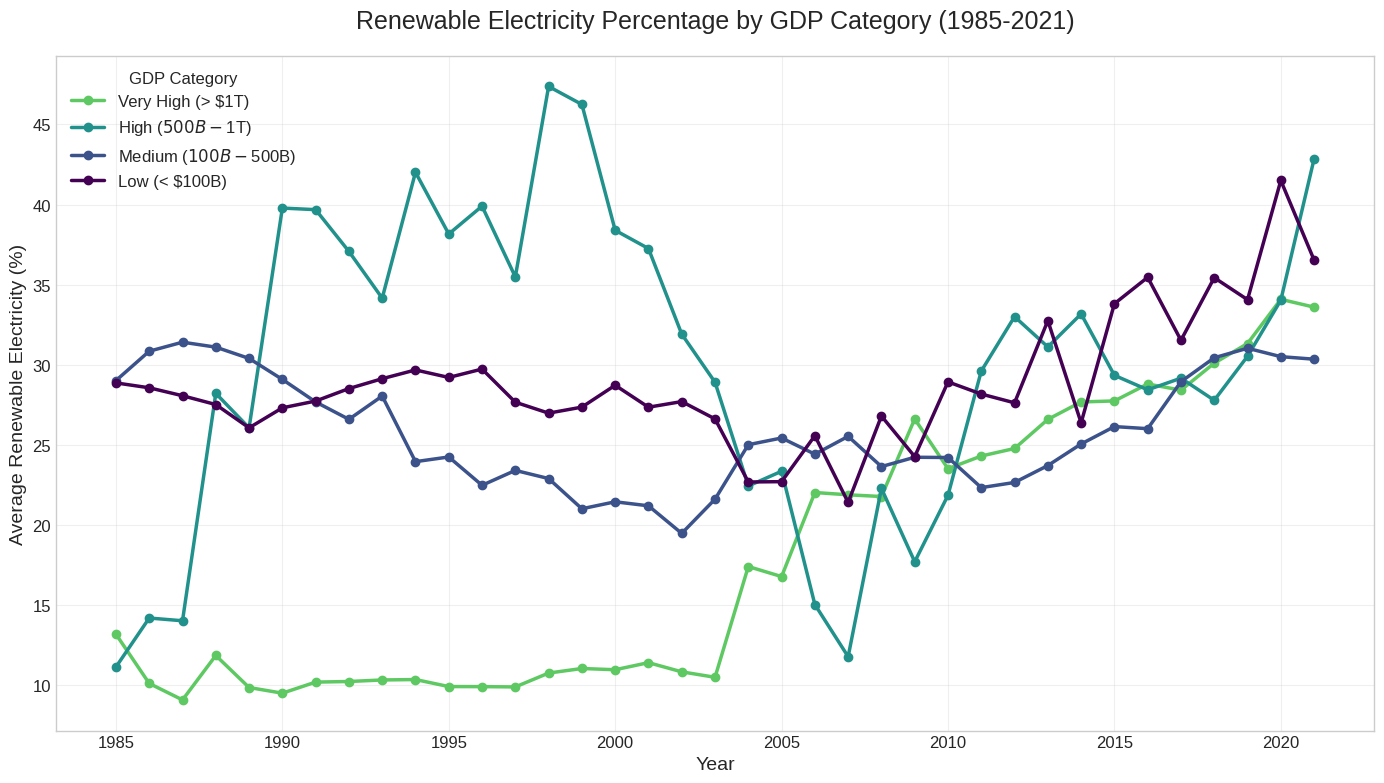

<Figure size 1400x800 with 0 Axes>

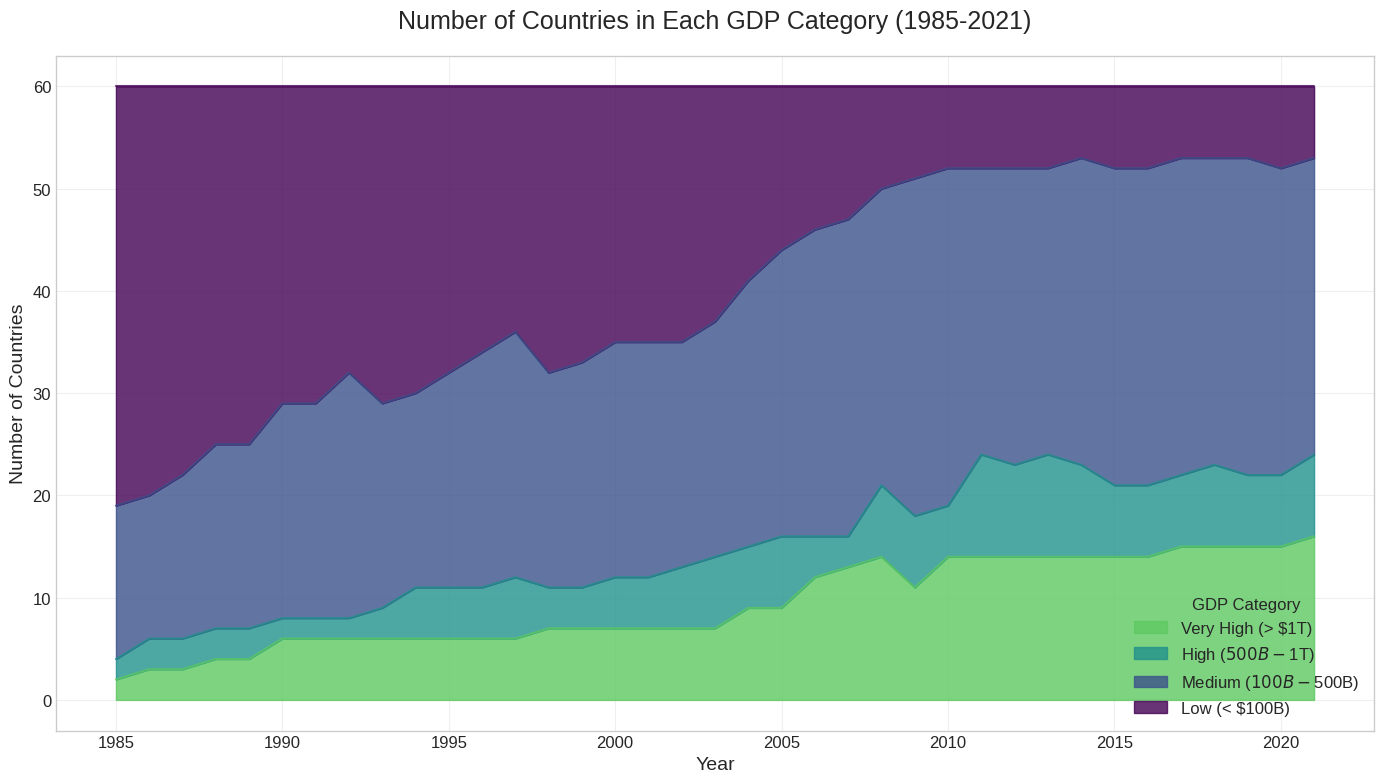

<Figure size 1600x1000 with 0 Axes>

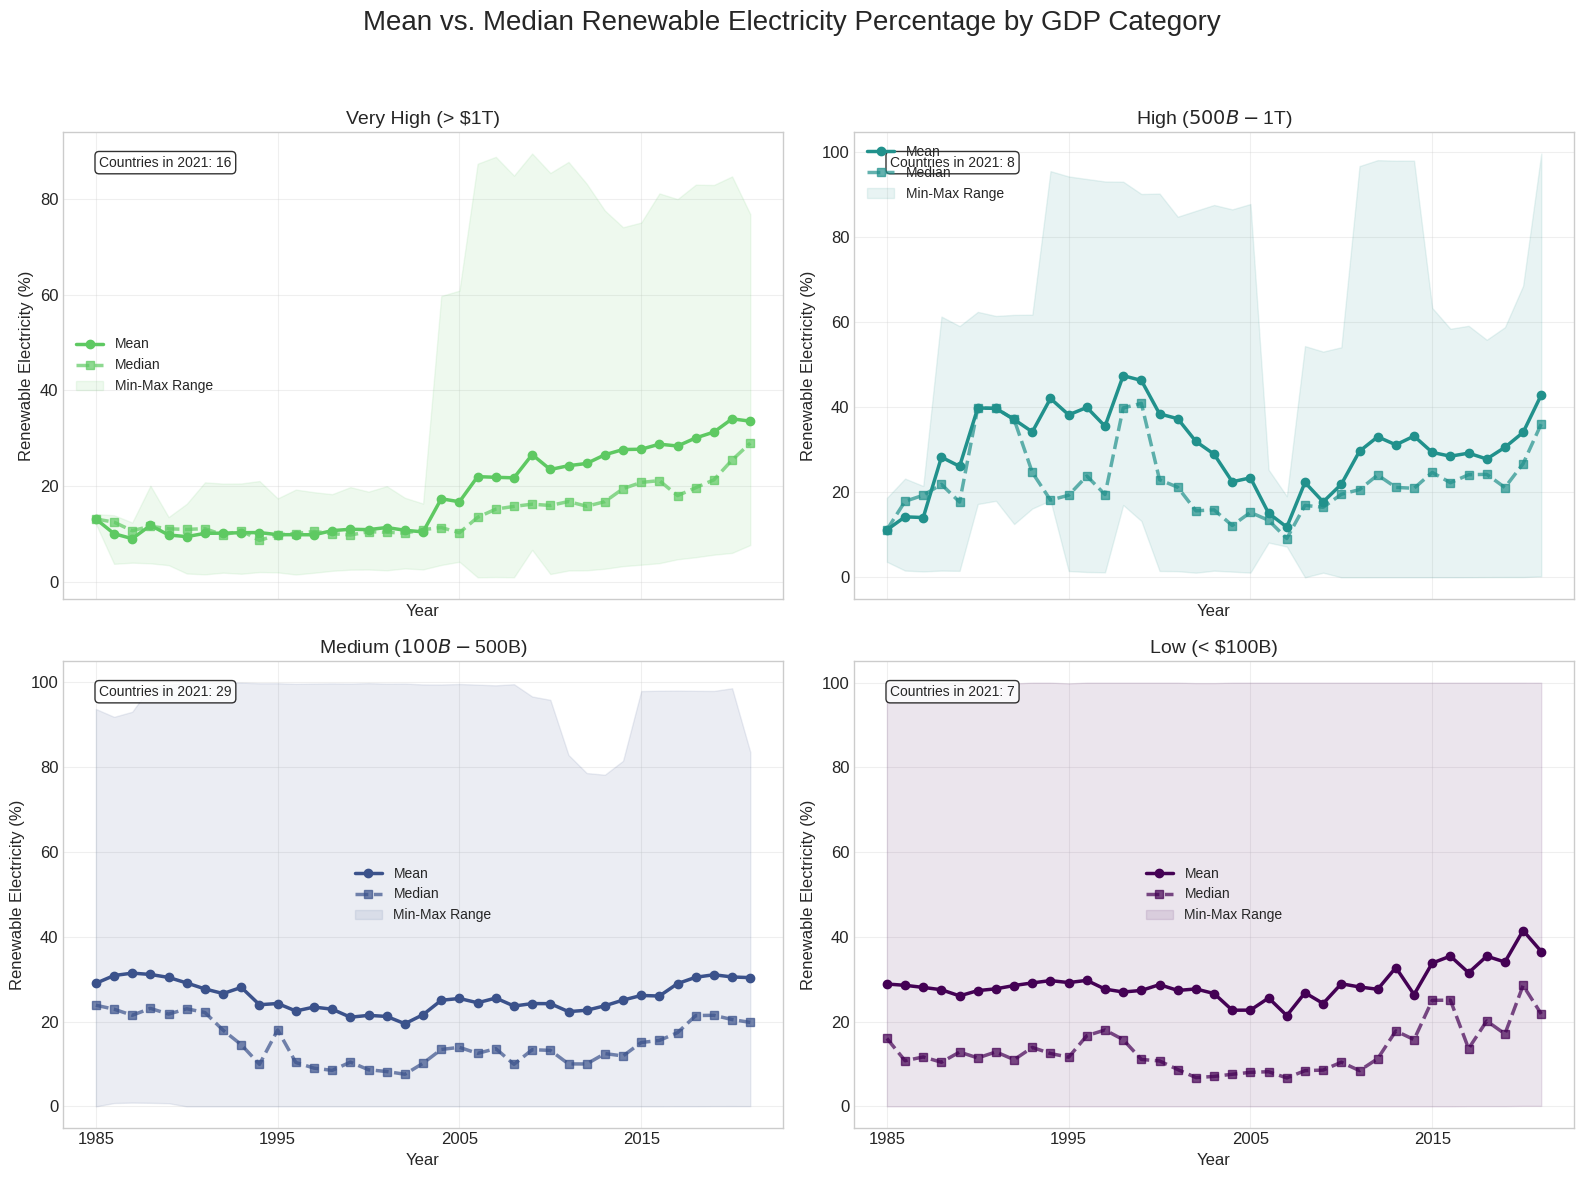

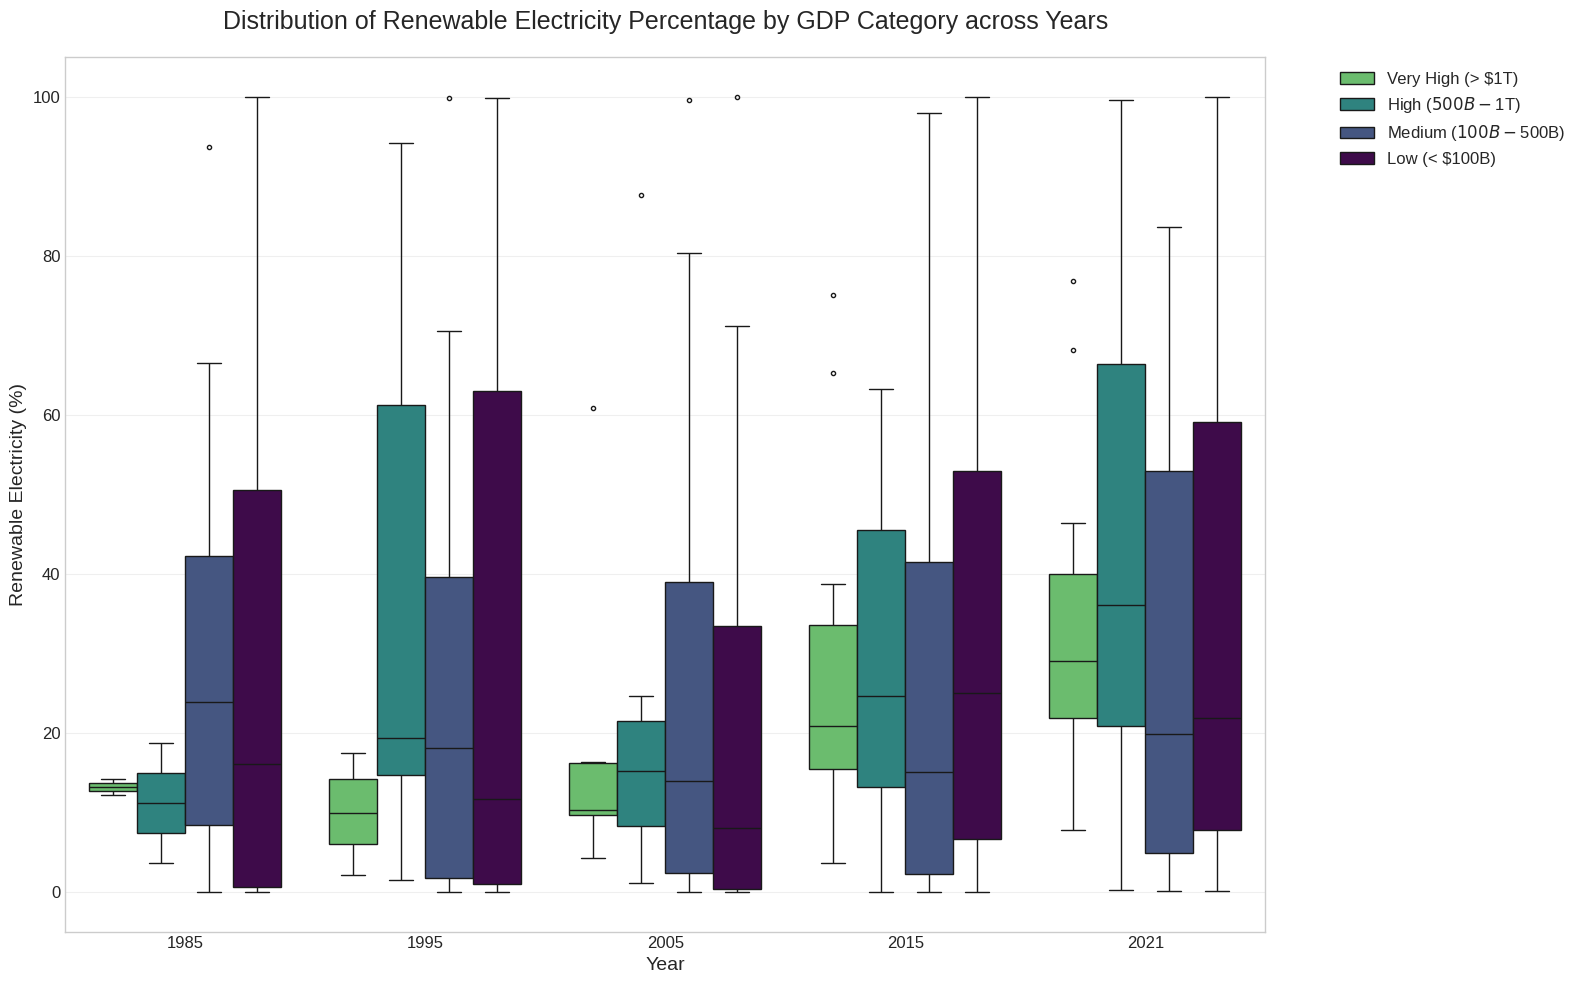

<ipython-input-45-e6b52ee654e7>:285: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_avgs = merged_df.groupby(['Decade', 'GDP_Category'])['Renewables (% electricity)'].mean().reset_index()


<Figure size 1400x800 with 0 Axes>

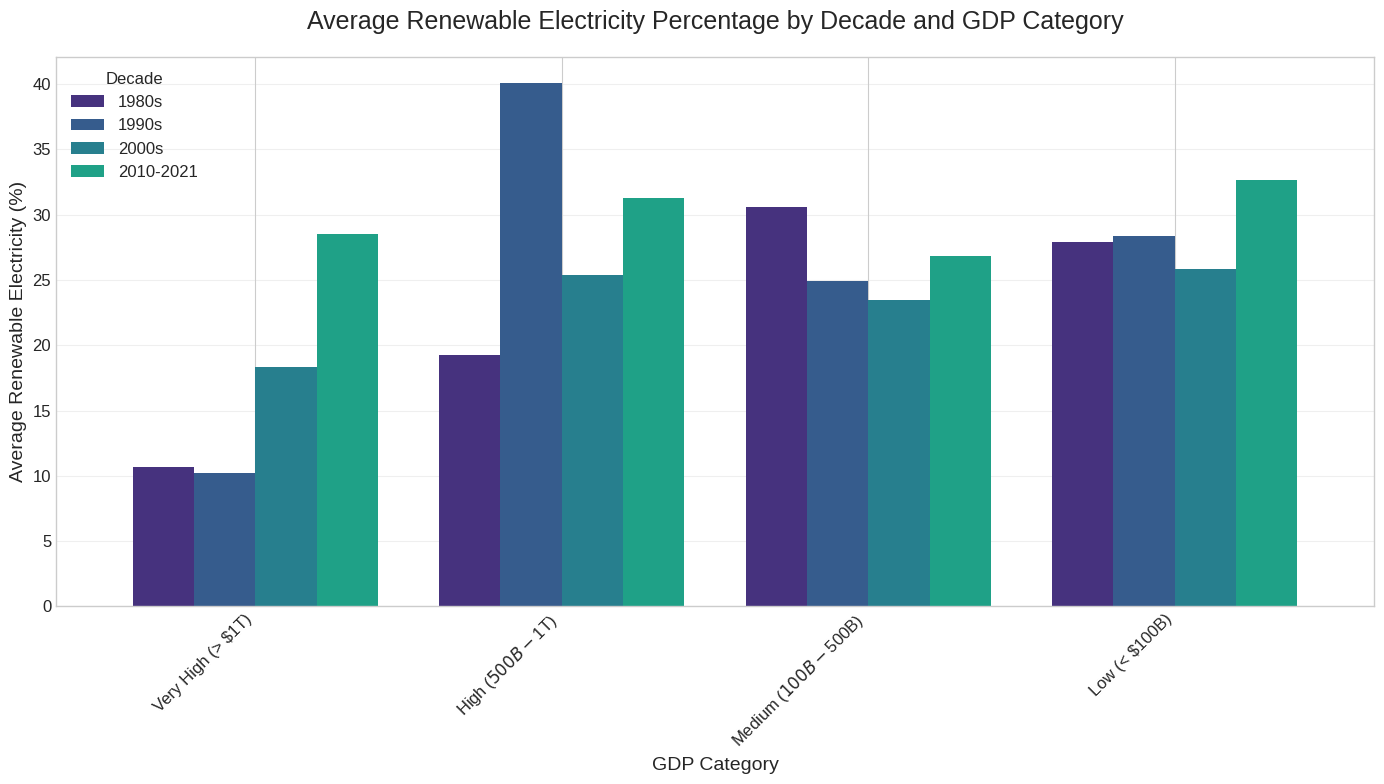


Summary Statistics for Renewable Electricity Percentage by GDP Category (2021):

Very High (> $1T) - 16 countries:
  Mean: 33.60%
  Median: 29.02%
  Min: 7.77%
  Max: 76.77%
  Top 3 countries by renewable percentage:
    Brazil: 76.77% (GDP: $1670.6B)
    Canada: 68.17% (GDP: $2007.5B)
    Spain: 46.43% (GDP: $1461.2B)

High ($500B - $1T) - 8 countries:
  Mean: 42.85%
  Median: 36.05%
  Min: 0.23%
  Max: 99.54%
  Top 3 countries by renewable percentage:
    Norway: 99.54% (GDP: $503.4B)
    Sweden: 67.38% (GDP: $637.2B)
    Switzerland: 66.06% (GDP: $813.4B)

Medium ($100B - $500B) - 29 countries:
  Mean: 30.35%
  Median: 19.81%
  Min: 0.06%
  Max: 83.55%
  Top 3 countries by renewable percentage:
    Ecuador: 83.55% (GDP: $107.4B)
    New Zealand: 80.72% (GDP: $253.6B)
    Denmark: 78.95% (GDP: $408.4B)

Low (< $100B) - 7 countries:
  Mean: 36.54%
  Median: 21.80%
  Min: 0.11%
  Max: 99.99%
  Top 3 countries by renewable percentage:
    Iceland: 99.99% (GDP: $25.8B)
    Luxembourg: 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

def binned_analysis_by_gdp_category():
    """
    Perform a detailed binned analysis by GDP category, examining renewable energy
    adoption patterns across different economic tiers over time.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_palette("viridis")
    plt.rcParams['figure.figsize'] = (14, 8)
    plt.rcParams['font.size'] = 12

    print("Loading data...")
    renewables_df = pd.read_csv('./clean_countries_renewables_1985_2021.csv')
    gdp_df = pd.read_csv('./gdp_data_news.csv')

    gdp_long = pd.melt(
        gdp_df,
        id_vars=['Country Name', 'Country Code', 'Indicator Name'],
        var_name='Year',
        value_name='GDP'
    )

    gdp_long['Year'] = pd.to_numeric(gdp_long['Year'], errors='coerce')
    gdp_long = gdp_long[~np.isnan(gdp_long['Year'])]

    gdp_long = gdp_long.rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

    merged_df = pd.merge(
        renewables_df,
        gdp_long,
        on=['Code', 'Year'],
        how='inner',
        suffixes=('_renewable', '_gdp')
    )

    merged_df['GDP_billions'] = merged_df['GDP'] / 1e9

    def categorize_gdp(gdp_billions):
        if gdp_billions < 100:
            return 'Low (< $100B)'
        elif gdp_billions < 500:
            return 'Medium ($100B - $500B)'
        elif gdp_billions < 1000:
            return 'High ($500B - $1T)'
        else:
            return 'Very High (> $1T)'

    # Apply the categorization
    merged_df['GDP_Category'] = merged_df['GDP_billions'].apply(categorize_gdp)

    # Define category order for consistent presentation
    category_order = [
        'Very High (> $1T)',
        'High ($500B - $1T)',
        'Medium ($100B - $500B)',
        'Low (< $100B)'
    ]

    # Define a color palette for categories
    category_colors = {
        'Low (< $100B)': '#440154',
        'Medium ($100B - $500B)': '#3b528b',
        'High ($500B - $1T)': '#21918c',
        'Very High (> $1T)': '#5ec962'
    }

    gdp_category_analysis = merged_df.groupby(['GDP_Category', 'Year'])['Renewables (% electricity)'].mean().reset_index()

    plt.figure(figsize=(14, 8))

    for category in category_order:
        category_data = gdp_category_analysis[gdp_category_analysis['GDP_Category'] == category]
        plt.plot(
            category_data['Year'],
            category_data['Renewables (% electricity)'],
            marker='o',
            linewidth=2.5,
            label=category,
            color=category_colors[category]
        )

    plt.title('Renewable Electricity Percentage by GDP Category (1985-2021)', fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Renewable Electricity (%)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, title='GDP Category')
    plt.xticks(range(1985, 2022, 5))
    plt.tight_layout()
    plt.savefig('renewables_by_gdp_category.png', dpi=300)
    plt.show()


    country_counts = merged_df.groupby(['Year', 'GDP_Category'])['Entity_renewable'].nunique().reset_index()
    country_counts = country_counts.rename(columns={'Entity_renewable': 'Country_Count'})

    plt.figure(figsize=(14, 8))

    pivot_counts = country_counts.pivot(index='Year', columns='GDP_Category', values='Country_Count')

    pivot_counts = pivot_counts[category_order]

    pivot_counts.plot.area(
        figsize=(14, 8),
        alpha=0.8,
        color=[category_colors[c] for c in category_order],
        stacked=True
    )

    plt.title('Number of Countries in Each GDP Category (1985-2021)', fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Countries', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, title='GDP Category')
    plt.xticks(range(1985, 2022, 5))
    plt.tight_layout()
    plt.savefig('country_counts_by_gdp_category.png', dpi=300)
    plt.show()

    # ---------------------------------------------
    # 3. Detailed GDP Category Analysis with Statistics
    # ---------------------------------------------

    # Calculate more statistics for each category and year
    detailed_stats = merged_df.groupby(['GDP_Category', 'Year']).agg({
        'Renewables (% electricity)': ['mean', 'median', 'std', 'min', 'max', 'count'],
        'Entity_renewable': 'nunique'
    }).reset_index()

    # Fix column names
    detailed_stats.columns = [
        'GDP_Category', 'Year', 'Mean_Renewables', 'Median_Renewables',
        'Std_Renewables', 'Min_Renewables', 'Max_Renewables', 'Count', 'Num_Countries'
    ]

    # Plot median vs mean to show distribution skew
    plt.figure(figsize=(16, 10))

    # Create a 2x2 grid of subplots, one for each category
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
    fig.suptitle('Mean vs. Median Renewable Electricity Percentage by GDP Category', fontsize=20, y=0.98)

    # Flatten the 2x2 array for easier indexing
    axes = axes.flatten()

    for i, category in enumerate(category_order):
        ax = axes[i]
        cat_data = detailed_stats[detailed_stats['GDP_Category'] == category]

        # Plot mean
        ax.plot(
            cat_data['Year'],
            cat_data['Mean_Renewables'],
            marker='o',
            linewidth=2.5,
            label='Mean',
            color=category_colors[category]
        )

        # Plot median
        ax.plot(
            cat_data['Year'],
            cat_data['Median_Renewables'],
            marker='s',
            linewidth=2.5,
            linestyle='--',
            label='Median',
            color=category_colors[category],
            alpha=0.7
        )

        # Add shaded area for min-max range
        ax.fill_between(
            cat_data['Year'],
            cat_data['Min_Renewables'],
            cat_data['Max_Renewables'],
            alpha=0.1,
            color=category_colors[category],
            label='Min-Max Range'
        )

        # Set titles and labels
        ax.set_title(f'{category}', fontsize=14)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Renewable Electricity (%)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=10)
        ax.set_xticks(range(1985, 2022, 10))

        # Add text for number of countries
        latest_data = cat_data[cat_data['Year'] == cat_data['Year'].max()]
        if len(latest_data) > 0:
            count_text = f"Countries in 2021: {latest_data.iloc[0]['Num_Countries']}"
            ax.text(
                0.05, 0.95,
                count_text,
                transform=ax.transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
            )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('mean_vs_median_by_gdp_category.png', dpi=300)
    plt.show()

    comparison_years = [1985, 1995, 2005, 2015, 2021]

    plt.figure(figsize=(16, 10))

    box_data = merged_df[merged_df['Year'].isin(comparison_years)]

    ax = sns.boxplot(
        x='Year',
        y='Renewables (% electricity)',
        hue='GDP_Category',
        data=box_data,
        palette=category_colors,
        hue_order=category_order,
        fliersize=3,
        linewidth=1
    )

    plt.title('Distribution of Renewable Electricity Percentage by GDP Category across Years', fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Renewable Electricity (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='GDP Category', fontsize=12)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.savefig('renewable_boxplot_by_gdp_category.png', dpi=300)
    plt.show()

    merged_df['Decade'] = pd.cut(
        merged_df['Year'],
        bins=[1980, 1990, 2000, 2010, 2022],
        labels=['1980s', '1990s', '2000s', '2010-2021'],
        right=False
    )

    decade_avgs = merged_df.groupby(['Decade', 'GDP_Category'])['Renewables (% electricity)'].mean().reset_index()

    plt.figure(figsize=(14, 8))

    pivot_decade = decade_avgs.pivot(index='GDP_Category', columns='Decade', values='Renewables (% electricity)')

    pivot_decade = pivot_decade.reindex(category_order)

    pivot_decade.plot(
        kind='bar',
        figsize=(14, 8),
        width=0.8
    )

    plt.title('Average Renewable Electricity Percentage by Decade and GDP Category', fontsize=18, pad=20)
    plt.xlabel('GDP Category', fontsize=14)
    plt.ylabel('Average Renewable Electricity (%)', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Decade', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig('renewable_decade_average_by_gdp_category.png', dpi=300)
    plt.show()

    latest_year = max(merged_df['Year'])
    latest_data = merged_df[merged_df['Year'] == latest_year]

    print(f"\nSummary Statistics for Renewable Electricity Percentage by GDP Category ({latest_year}):")

    for category in category_order:
        cat_data = latest_data[latest_data['GDP_Category'] == category]

        if len(cat_data) > 0:
            print(f"\n{category} - {len(cat_data)} countries:")
            print(f"  Mean: {cat_data['Renewables (% electricity)'].mean():.2f}%")
            print(f"  Median: {cat_data['Renewables (% electricity)'].median():.2f}%")
            print(f"  Min: {cat_data['Renewables (% electricity)'].min():.2f}%")
            print(f"  Max: {cat_data['Renewables (% electricity)'].max():.2f}%")

            top3 = cat_data.nlargest(3, 'Renewables (% electricity)')
            print("  Top 3 countries by renewable percentage:")
            for _, row in top3.iterrows():
                print(f"    {row['Entity_renewable']}: {row['Renewables (% electricity)']:.2f}% (GDP: ${row['GDP_billions']:.1f}B)")

    return merged_df, gdp_category_analysis

if __name__ == "__main__":
    merged_df, gdp_category_analysis = binned_analysis_by_gdp_category()